Training script for MMD Loss with Gaussian kernel.

$\mathcal{L}_{MMD} = \mathbb{E}_{x,y\sim p_\theta}[k_G(x,y)] + \mathbb{E}_{x,y\sim \pi}[k_G(x,y)] - 2\mathbb{E}_{x\sim p_\theta, y \sim \pi}[k_G(x,y)]$

where $k_G(x,y) = \frac{1}{c} \sum_{i=1}^c \text{exp}\left( - \frac{||x - y||^2_2}{2 \sigma_i} \right)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import IQP
from qiskit.circuit import ParameterVector

from src import QCIBM_utilities as ut

In [2]:
nq = 4
#alpha_init = np.array([[1,0],[0.1,0.3]])
#Gamma_init = np.array([1,1])
#Delta_init = np.array([0.5, 0.2])
#Sigma_init = np.array([0,0.1])
#theta_init = ut.compose_params(alpha_init, Gamma_init, Delta_init, Sigma_init)

rng = np.random.default_rng(27031995)

theta_init = np.array((np.pi) * rng.random(int(nq*(nq+3)/2)))
theta = ParameterVector('θ', int(nq*(nq+3)/2))

In [3]:
# Sample hyperparams
p_pi = 0.6
n_train = 500
sampleshots = 500

In [4]:
kernel_bandwidth = np.array([0.25,10,1000])

In [5]:
backend = Aer.get_backend('qasm_simulator')

In [6]:

alpha, Gamma, Delta, Sigma = ut.decompose_params(theta, nq)
qc = ut.QCIBM(alpha, Gamma, Delta, Sigma, nq)
qc = transpile(qc, backend)

In [7]:
# Samples modes
T = 3
ps = 0.4
pi_modes = np.zeros((T,nq)) 
for t in range(T):
    for i in range(nq):
        pi_modes[t,i] = rng.binomial(1, ps)
print('modes = ', pi_modes)

modes =  [[0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]


In [8]:
ysamples, pi_vec = ut.sample_target_pdf(n_train, pi_modes, p_pi)
xsamples, phat = ut.sample_circuit( backend, sampleshots, qc.bind_parameters({theta: theta_init}))

In [9]:
def L_wrapper(theta_, xsamples):
    L = ut.MMD_Gauss_Loss(xsamples, ysamples, kernel_bandwidth)
    return(L)

def grad_wrapper(theta_, xsamples, ysamples):
    nablaL = ut.MMD_Gauss_grad(qc, theta, theta_, xsamples, ysamples, backend, kernel_bandwidth)
    return(nablaL)

In [10]:
#print(L_wrapper(theta_init, xsamples))
#print(grad_wrapper(theta_init, xsamples))

In [11]:
eta = 0.010 #stepsize
theta_opt, MMD_history, TV_history = ut.adam(L_wrapper, grad_wrapper, theta, theta_init, backend, qc, sampleshots, ysamples, batch_size = 250, p_target = pi_vec, tol = -1, maxiter = 400, alpha = eta)
print('θ_opt = ', theta_opt)
print('min Loss = ', MMD_history[-1])


 -- Adam Optimization -- Step t =  1
 - Current Loss =  0.042995721088835204
 -- Adam Optimization -- Step t =  2
 - Current Loss =  0.05757503501031902
 -- Adam Optimization -- Step t =  3
 - Current Loss =  0.04814639941497312
 -- Adam Optimization -- Step t =  4
 - Current Loss =  0.034644469947600065
 -- Adam Optimization -- Step t =  5
 - Current Loss =  0.02450608962420464
 -- Adam Optimization -- Step t =  6
 - Current Loss =  0.025629255821165486
 -- Adam Optimization -- Step t =  7
 - Current Loss =  0.023126742507660225
 -- Adam Optimization -- Step t =  8
 - Current Loss =  0.02008127414364491
 -- Adam Optimization -- Step t =  9
 - Current Loss =  0.020281186951582875
 -- Adam Optimization -- Step t =  10
 - Current Loss =  0.018583468149810045
 -- Adam Optimization -- Step t =  11
 - Current Loss =  0.019089369826070346
 -- Adam Optimization -- Step t =  12
 - Current Loss =  0.01784501109804726
 -- Adam Optimization -- Step t =  13
 - Current Loss =  0.01608260419584706
 

 -- Adam Optimization -- Step t =  107
 - Current Loss =  0.009520295093250475
 -- Adam Optimization -- Step t =  108
 - Current Loss =  0.009467917346554167
 -- Adam Optimization -- Step t =  109
 - Current Loss =  0.009398247167110796
 -- Adam Optimization -- Step t =  110
 - Current Loss =  0.009303964418414523
 -- Adam Optimization -- Step t =  111
 - Current Loss =  0.009303964418414523
 -- Adam Optimization -- Step t =  112
 - Current Loss =  0.00914136019541889
 -- Adam Optimization -- Step t =  113
 - Current Loss =  0.009191606786401074
 -- Adam Optimization -- Step t =  114
 - Current Loss =  0.009400857001197416
 -- Adam Optimization -- Step t =  115
 - Current Loss =  0.009501347190990828
 -- Adam Optimization -- Step t =  116
 - Current Loss =  0.009529664667631721
 -- Adam Optimization -- Step t =  117
 - Current Loss =  0.00956632741714003
 -- Adam Optimization -- Step t =  118
 - Current Loss =  0.009525477265232674
 -- Adam Optimization -- Step t =  119
 - Current Loss

 -- Adam Optimization -- Step t =  211
 - Current Loss =  0.008591274067801358
 -- Adam Optimization -- Step t =  212
 - Current Loss =  0.008640302543047262
 -- Adam Optimization -- Step t =  213
 - Current Loss =  0.008609423590418608
 -- Adam Optimization -- Step t =  214
 - Current Loss =  0.008559336717402388
 -- Adam Optimization -- Step t =  215
 - Current Loss =  0.008526529947681993
 -- Adam Optimization -- Step t =  216
 - Current Loss =  0.008568543967927056
 -- Adam Optimization -- Step t =  217
 - Current Loss =  0.008627749083739644
 -- Adam Optimization -- Step t =  218
 - Current Loss =  0.008616211425296783
 -- Adam Optimization -- Step t =  219
 - Current Loss =  0.008557835532508662
 -- Adam Optimization -- Step t =  220
 - Current Loss =  0.008503110180612339
 -- Adam Optimization -- Step t =  221
 - Current Loss =  0.008616585617288841
 -- Adam Optimization -- Step t =  222
 - Current Loss =  0.008660708706985432
 -- Adam Optimization -- Step t =  223
 - Current Lo

 -- Adam Optimization -- Step t =  315
 - Current Loss =  0.008686875825686613
 -- Adam Optimization -- Step t =  316
 - Current Loss =  0.008682655934768135
 -- Adam Optimization -- Step t =  317
 - Current Loss =  0.008629628353691743
 -- Adam Optimization -- Step t =  318
 - Current Loss =  0.008642424419830874
 -- Adam Optimization -- Step t =  319
 - Current Loss =  0.008671395211648836
 -- Adam Optimization -- Step t =  320
 - Current Loss =  0.008653858336178821
 -- Adam Optimization -- Step t =  321
 - Current Loss =  0.008608959707669506
 -- Adam Optimization -- Step t =  322
 - Current Loss =  0.00853433611574772
 -- Adam Optimization -- Step t =  323
 - Current Loss =  0.008572630313513407
 -- Adam Optimization -- Step t =  324
 - Current Loss =  0.008594483203077985
 -- Adam Optimization -- Step t =  325
 - Current Loss =  0.008591615632101757
 -- Adam Optimization -- Step t =  326
 - Current Loss =  0.008571776209102211
 -- Adam Optimization -- Step t =  327
 - Current Los

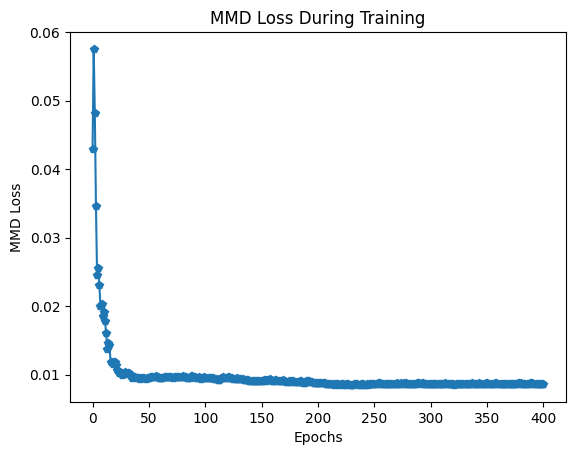

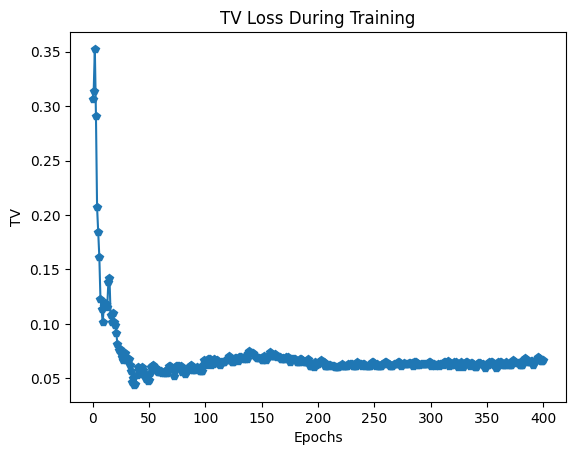

In [12]:
plt.plot(range(len(MMD_history)),MMD_history, marker='p')
plt.title("MMD Loss During Training")
plt.xlabel("Epochs")
plt.ylabel("MMD Loss")
plt.show()

plt.plot(range(len(TV_history)),TV_history, marker='p')
plt.title("TV Loss During Training")
plt.xlabel("Epochs")
plt.ylabel("TV")
plt.show()

In [13]:
xsamples, phat = ut.sample_circuit( backend, sampleshots, qc.bind_parameters({theta: theta_opt}))

print('Original samples probs, π = ', pi_vec)
print('Optimized probabilitites, p(θ)= ', phat)

Original samples probs, π =  [0.0912     0.0848     0.0608     0.05653333 0.0768     0.0672
 0.0512     0.0448     0.0768     0.0672     0.0512     0.0448
 0.0752     0.0608     0.05013333 0.04053333]
Optimized probabilitites, p(θ)=  [0.078 0.09  0.068 0.064 0.094 0.07  0.056 0.042 0.068 0.052 0.05  0.038
 0.094 0.064 0.04  0.032]


['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']


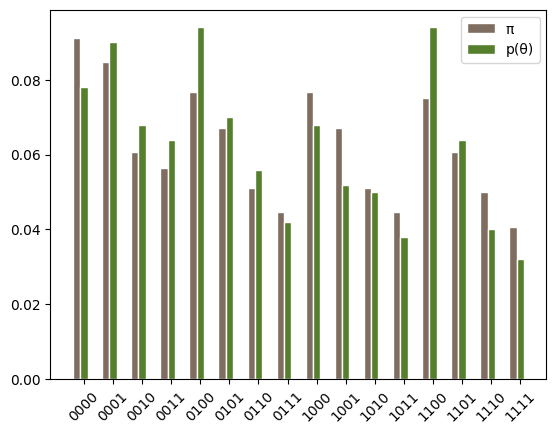

In [14]:
xlabels = []
for j in range(2**nq):
    xlabels.append(ut.binstr_from_int(j,nq))

print(xlabels)

barWidth = 0.25
 
r1 = np.arange(len(pi_vec))
r2 = [x + barWidth for x in r1]
plt.bar(r1, pi_vec, color='#7f6d5f', width=barWidth, edgecolor='white', label='π')
plt.bar(r2, phat, color='#557f2d', width=barWidth, edgecolor='white', label='p(θ)')
plt.xticks([r + barWidth for r in range(len(pi_vec))], xlabels, rotation=45)
plt.legend()
plt.show()

In [15]:
path = '/home/alb/Scrivania/Quantum/Projects/BornMachine/data/'
np.savetxt(path+'MMDTraining4qb400italpha010_theta_opt.csv', theta_opt, delimiter=',')
np.savetxt(path+'MMDTraining4qb400italpha010_MMD_history.csv', MMD_history, delimiter=',')
np.savetxt(path+'MMDTraining4qb400italpha010_TV_history.csv', TV_history, delimiter=',')